# Scalability of *in situ* backpropagation

In this notebook, we explore the scalability of *in situ* backpropagation as it pertains to the tradeoff between noise and energy efficiency and latency of photonic devices. 
- As far as scalability of the photonic advantage, we do our best to incorporate all of the different elements that contribute to the total energy consumption in the hybrid photonic neural network design, dominated by optoelectronic conversions and signal amplification, and any assumptions for this calculation are provided in the main text and/or Supplementary Material of the paper.
- As far as noise error scaling, we explore the tradeoffs of various errors (e.g., systematic in the various photonic elements and random noise at the photodetector). We then perform large-scale simulations on MNIST data to show that realistic problems can be solved using our approach in the presence of error.



In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
pip install simphox

Note: you may need to restart the kernel to use updated packages.


<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W
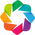

[CpuDevice(id=0)]

In [3]:
from simphox.circuit import rectangular
from simphox.utils import random_unitary
from jax import jit
import jax
import numpy as np
import jax.numpy as jnp
from mlflow import log_metric, log_param, log_artifacts
import wandb

import holoviews as hv
hv.extension('bokeh')

from dataclasses import dataclass

jax.config.update('jax_platform_name', 'cpu')  # change to cpu if not using gpu (slower!)
jax.config.update("jax_enable_x64", False)
jax.devices()

In [4]:
mesh = rectangular(random_unitary(256).astype(np.complex64)) # use this object to get the necessary functions
mesh_0 = mesh
mesh_1 = rectangular(random_unitary(256).astype(np.complex64))
mesh_2 = rectangular(random_unitary(256).astype(np.complex64))

In [5]:
from PIL import Image, ImageFilter

In [10]:
from keras.datasets import cifar10
from utils import CIFARTenDataProcessor

cifar_dp = CIFARTenDataProcessor()
data = cifar_dp.fourier(8)

In [11]:
print(data.y_test.shape)

(10000, 10)


In [12]:
from jax import grad
from jax import vjp

prop_jit = jit(mesh.propagate_matrix_fn(use_jax=True, explicit=True))
prop = mesh.propagate_matrix_fn(use_jax=False, explicit=True)
matrix_fn = mesh.matrix_fn(use_jax=True)
ones = jnp.ones(256, dtype=jnp.complex64)
tr = lambda u: jnp.abs(u[0, 0]) ** 2
fn = lambda params: tr(matrix_fn(params))
fn_jit = jit(fn)

grad_fn = grad(fn)
grad_fn_jit = grad(fn_jit)

In [13]:
from jax.scipy.special import logsumexp
from jax import vmap, vjp

def dropout_softmax(outputs, num_classes: int = 10):
    return jax.nn.log_softmax(outputs[:num_classes]).astype(jnp.float32)

matrix_fn = jit(mesh.matrix_fn(use_jax=True))

def cifar_onn(params, inputs):
    # per-example predictions
    outputs = inputs
    for param in params:
        outputs = jnp.abs(matrix_fn(param, outputs))[:, 0] + 0j
    outputs = jnp.abs(outputs) ** 2
    return dropout_softmax(outputs, 10)

batched_cifar_onn = vmap(cifar_onn, in_axes=(None, 0))

In [14]:
@jit
def batch_loss(params, inputs, targets):
    preds = batched_cifar_onn(params, inputs)
    return -jnp.mean(preds.squeeze() * targets).real

@jit
def loss(params, inputs, targets):
    preds = cifar_onn(params, inputs)
    return -jnp.mean(preds.squeeze() * targets).real

In [ ]:
def evaluate(params, images, targets):
    target_class = jnp.argmax(targets, axis=1)
    predicted_class = jnp.argmax(batched_cifar_onn(params, images), axis=1)
    return jnp.mean(predicted_class == target_class)

In [62]:
from jax.example_libraries.optimizers import adam
from tqdm.notebook import tqdm as pbar
from jax import value_and_grad

step_size = 0.001

num_iters = 1200
batch_size = 128
num_epochs = 50

x_train = jnp.array(data.x_train).astype(np.complex64)
y_train = jnp.array(data.y_train).astype(np.float32)

In [63]:
x_test = jnp.array(data.x_test).astype(np.complex64)
y_test = jnp.array(data.y_test).astype(np.float32)

opt_init, opt_update, get_params = adam(step_size=step_size)
init_params = [mesh_0.params, mesh_1.params, mesh_2.params]
init = opt_init(init_params)

def update_fn(i, state):
    start = (i * batch_size) % 50000
    stop = ((i + 1) * batch_size) % 50000
    v, g = value_and_grad(batch_loss)(get_params(state), x_train[start:stop], y_train[start:stop])
    return v, opt_update(i, g, state)

losses = []
opt_state = init

for epoch in range(num_epochs):
    iterator = pbar(range(x_train.shape[0]//batch_size))
    for i in iterator:
        v, opt_state = update_fn(i, opt_state)
        losses.append(v)
        iterator.set_description(f"𝓛: {v:.5f}")
    print(f"Batch size {batch_size}, epoch {epoch+1}: test accuracy is {evaluate(get_params(opt_state), x_test, y_test).item()}")
    # print(f"Train accuracy is {evaluate(get_params(opt_state), x_train, y_train).item()}")

  0%|          | 0/1562 [00:00<?, ?it/s]

KeyboardInterrupt: 

In [ ]:
batch_loss(get_params(opt_state), x_test, y_test)

In [ ]:
print(y_test.shape)

In [21]:
evaluate(get_params(opt_state), x_test, y_test).item()

0.09999999403953552

In [61]:
nplosses = np.array(losses)
with np.printoptions(threshold=np.inf):
    for i in range(np.shape(nplosses)[0]):
        print(list(enumerate(list(nplosses)))[i])

(0, 2.9305437)
(1, 2.726717)
(2, 5.6478076)
(3, 1.8621563)
(4, 3.2459278)
(5, 3.2684135)
(6, 3.6867025)
(7, 3.5666215)
(8, 3.5596626)
(9, 3.2248096)
(10, 2.8013332)
(11, 2.2840595)
(12, 1.996918)
(13, 1.2190584)
(14, 1.4562438)
(15, 2.2973554)
(16, 2.0406346)
(17, 1.4686996)
(18, 0.90041465)
(19, 0.46402073)
(20, 0.48684594)
(21, 0.4515811)
(22, 0.3670866)
(23, 0.49838257)
(24, 0.53109103)
(25, 0.56680405)
(26, 0.48217678)
(27, 0.47321835)
(28, 0.44252968)
(29, 0.4761884)
(30, 0.46418044)
(31, 0.48402363)
(32, 0.42657638)
(33, 0.4178388)
(34, 0.32926518)
(35, 0.34380633)
(36, 0.3090646)
(37, 0.30316973)
(38, 0.31185803)
(39, 0.26745296)
(40, 0.2859601)
(41, 0.26100877)
(42, 0.2632288)
(43, 0.2426542)
(44, 0.25743264)
(45, 0.24395525)
(46, 0.24674797)
(47, 0.24287252)
(48, 0.25196892)
(49, 0.25118408)
(50, 0.26236826)
(51, 0.25949648)
(52, 0.2514008)
(53, 0.2588893)
(54, 0.25276428)
(55, 0.23597042)
(56, 0.24162209)
(57, 0.23566285)
(58, 0.23749037)
(59, 0.23579727)
(60, 0.22970784)
(61